# 🥗 Feature Selection and Extraction

<img src="https://i.imgur.com/ixT1AN7.png">

## ✨ Feature Extraction

Base class is not that interesting (mainly provides feature hashing with can help with space) but has submodules for text and images.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [                              # e.g., some emails
    'This is the first document document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()                      # check out TFIDFVectorizer as well
x_data = vectorizer.fit_transform(corpus)
x_data.toarray()                                    # goes to your machine learning model

array([[0, 2, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

Image subclass is not that serious

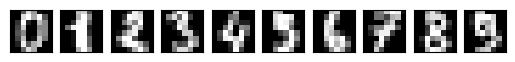

In [3]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image

x_data, y_data = load_digits(return_X_y=True)
x_data = x_data.reshape((-1, 8, 8))

# plot the first image 8 images in subplot row
fig, ax = plt.subplots(1, 10)
for i, axi in enumerate(ax):
    axi.imshow(x_data[i], cmap='gray')
    axi.set(xticks=[], yticks=[])

In [4]:
pe = image.PatchExtractor(patch_size=(4, 4))
pe_trans = pe.transform(x_data)
print(f"Patches shape: {pe_trans.shape}")

Patches shape: (44925, 4, 4)


Meanwhile, [Scikit-image](https://scikit-image.org/docs/stable/api/skimage.feature.html) has many useful feature extractors from images (likely including those you covered in image processing). OpenCV is a popular alternative as well.

## 🕵️ Feature Selection

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer

# load dataset
x_data, y_data = load_breast_cancer(return_X_y=True)
print(x_data.shape)

(569, 30)


#### Sequential Feature Selection

In [6]:
# perform feature selection
qda = QuadraticDiscriminantAnalysis()
sfs = SequentialFeatureSelector(qda, direction='forward', tol=0.01)     # add a new feature as long as 0.01 or more improvement
sfs.fit(x_data, y_data)
x_data_s = sfs.transform(x_data)

In [7]:
# evaluate with and without feature selection
qda.fit(x_data, y_data)
print(f"Score without feature selection: {qda.score(x_data, y_data)}") 
qda.fit(x_data_s, y_data)
print(f"Score with feature selection: {qda.score(x_data_s, y_data)}")

Score without feature selection: 0.9736379613356766
Score with feature selection: 0.968365553602812


#### Variance Threshold

In [8]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

#### Select From Model

- Relies on a model that associate a number representing importance for each feature
- `sklearn.inspection.permutation_importance` provides a method to compute importances for any model

In [9]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(x_data, y_data)
lr.score(x_data, y_data)
lr.coef_                    # associates every feature with a weight (as in the linear decision boundary)

array([[ 2.10081501e+00,  1.22085552e-01, -5.71924127e-02,
        -3.60029317e-03, -1.53733757e-01, -3.99768728e-01,
        -6.43412416e-01, -3.40077706e-01, -2.25828354e-01,
        -2.60069466e-02, -2.59769771e-02,  1.24773873e+00,
         1.49072031e-03, -9.46478543e-02, -1.68390632e-02,
         6.92846839e-03, -4.64697660e-02, -3.99765630e-02,
        -4.22095909e-02,  6.39855868e-03,  1.24496844e+00,
        -3.46258726e-01, -1.25774404e-01, -2.39876939e-02,
        -2.84550302e-01, -1.11851947e+00, -1.57157037e+00,
        -6.53621485e-01, -6.90061939e-01, -1.12854301e-01]])

In [10]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(lr, threshold="mean")
x_data_s = sfm.fit_transform(x_data, y_data)        # discard features with weights below average

Recursive feature implementation does the same but removes the features sequentially for better accuracy. Most other methods are statistics-oriented (filter-based).

## 🎨 Feature Visualization

As well helps in contrasting different features.

- Basic Approach: Study seperability and distribution via a 2D or 3D plot

- Problem: Often have far more than that number of features
    - PCA distorts the nonlinear decision boundary

Techniques like t-SNE and UMAP help with nonlinear dimensionality reduction **for visualization purposes**

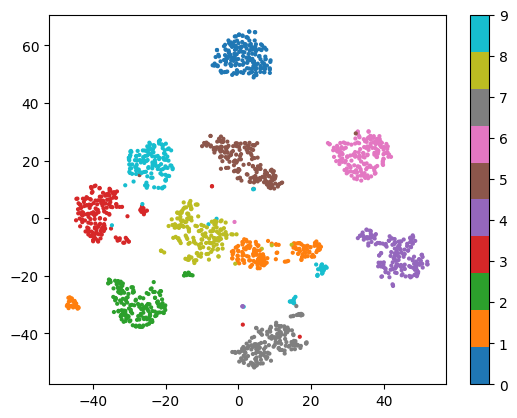

In [11]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


x_data, y_data = load_digits(return_X_y=True)
tsne = TSNE(n_components=2, random_state=0, perplexity=30)      # perplexity is related to the number of nearest neighbors
x_data_tsne = tsne.fit_transform(x_data)                        # has no pure transform

# scatter plot
plt.scatter(x_data_tsne[:, 0], x_data_tsne[:, 1], c=y_data, cmap='tab10', s=4)
plt.colorbar()
plt.show()